In [ ]:
#libraries requires:pandas geopandas descartes geoplot

In [ ]:
pip install pandas geopandas descartes geoplot shapely

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from matplotlib.lines import Line2D

In [15]:
seattle_coord = (47.7511, 120.7401)

df = pd.DataFrame(
    {'City': "seattle",
     'Latitude': [seattle_coord[0]],
     'Longitude': [seattle_coord[1]]
                   })
df.head()

,City,Latitude,Longitude
0,seattle,47.7511,120.7401


In [16]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(-df.Longitude, df.Latitude), crs = 4326)

In [13]:
usa = gpd.read_file("states/states.shp")

In [ ]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


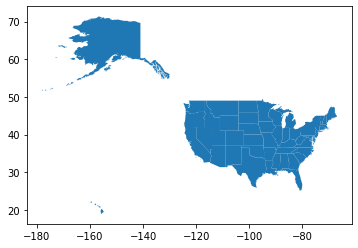

In [17]:
usa.plot()

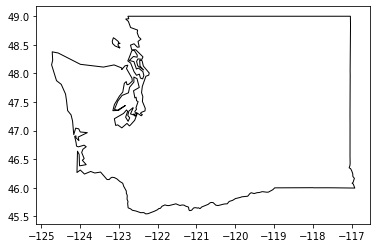

In [18]:
usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black")

In [97]:
houses = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/housing_data_cleaned.csv")
houses

,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long
0,20141013T000000,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319
2,20141209T000000,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393
3,20150415T000000,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337
4,20140527T000000,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,20150219T000000,475000,3,2.50,121,119,2.0,0,3,8,12,2008,0,98116,47.5773,-122.409
7977,20140521T000000,360000,3,2.50,141,104,3.0,0,3,8,0,2009,0,98103,47.6993,-122.346
7978,20150223T000000,400000,4,2.50,213,535,2.0,0,3,8,0,2014,0,98146,47.5107,-122.362
7979,20140623T000000,402101,2,0.75,94,124,2.0,0,3,7,0,2009,0,98144,47.5944,-122.299


numar randuri: 7981


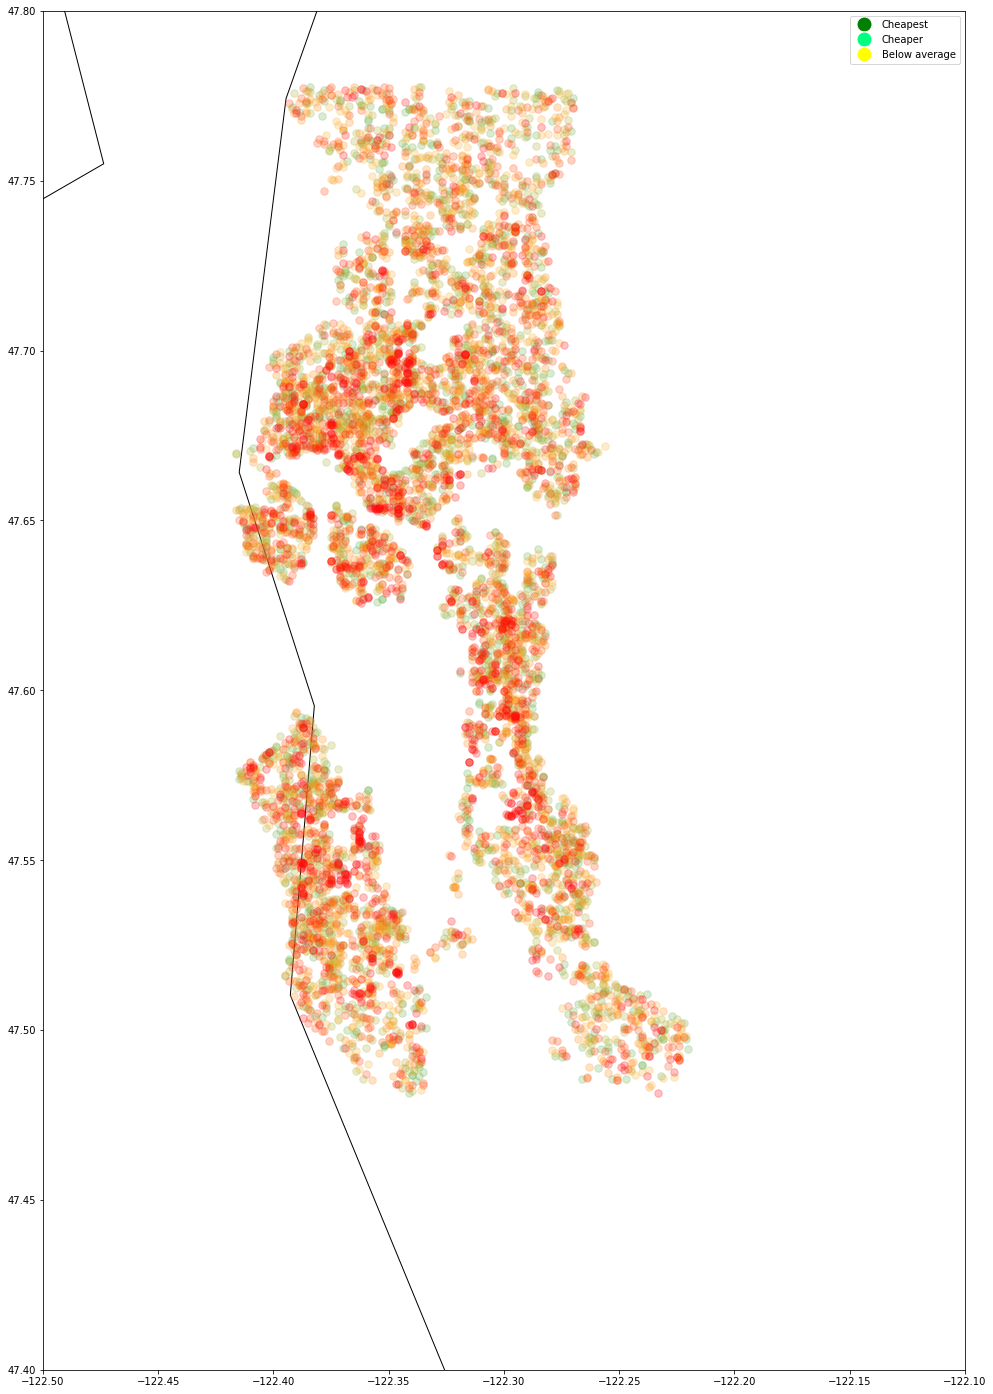

In [129]:
ax = usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black", figsize=(25,25))
#ax.margins(x=-0.2, y=-0.45)
ax.set_xlim(-122.5, -122.1)
ax.set_ylim(47.4, 47.8)
gradient_arr = ['#69B34C', '#ACB334', '#FAB334', '#FF8E15', '#FF4E11', '#FF0D0D']
houses.sort_values(by=['price'])
row_numbers = len(houses['price'])
print("numar randuri:", row_numbers)
separator = row_numbers / 6

for i, row in houses.iterrows():
  plt.plot(row['long'], row['lat'], marker=".", color=gradient_arr[int(i/separator)], markersize=15, alpha=0.25)
#plt.legend(['green', 'light green', 'light yellow', 'yellow', 'orange', 'red'], ['cheapest', 'cheaper', 'below average', 'above average', 'expensive', 'the most expensive']);
cheapest_legend = Line2D([0], [0], marker='o', color='w', label='Cheapest',
                        markerfacecolor='green', markersize=15)
cheaper_legend = Line2D([0], [0], marker='o', color='w', label='Cheaper',
                        markerfacecolor='springgreen', markersize=15)
below_legend = Line2D([0], [0], marker='o', color='w', label='Below average',
                        markerfacecolor='yellow', markersize=15)
plt.legend(handles=[cheapest_legend, cheaper_legend, below_legend])
plt.show()


In [ ]:
seattle_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=16,
                        tiles='openstreetmap')
for i, row in houses.head(1000).iterrows(): 
  lat = row['lat']
  print(lat)
  long = row['long']
  marker = folium.Marker([lat, long]).add_to(seattle_map)
seattle_map

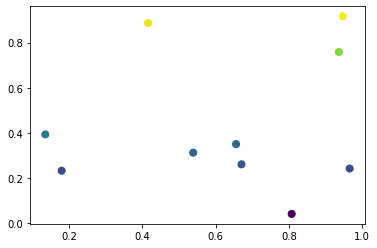

In [76]:
x = np.random.random(10)
y = np.random.random(10)
gradient_arr = ['#69B34C', '#ACB334', 'FAB334', 'FF8E15', 'FF4E11', 'FF0D0D']
plt.scatter(x, y, c=y, s=50)
plt.show()